# ------------------------------------------------------------------------------------------------------------

# 1.Model Building

# ------------------------------------------------------------------------------------------------------------

### 1.Import Libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

### 2.Defining Activation Functions

In [40]:
def sigmoid(Z):
    
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    
    
    A = np.maximum(0,Z)
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) 
   
    dZ[Z <= 0] = 0
    
    return dZ

def sigmoid_backward(dA, cache):
    
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

## 3 - Initialization


In [41]:

def initialize_parameters_deep(layer_dims):
    
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
    return parameters

## 4 - Forward propagation module


### 4.1

In [42]:

def linear_forward(A, W, b):
    Z = np.dot(W,A)+b
    cache = (A, W, b)
    return Z, cache

#### 4.2

In [43]:

def linear_activation_forward(A_prev, W, b, activation):
    
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

### 4.3

In [44]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                 
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu') 
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], 'sigmoid') 
    caches.append(cache)            
    return AL, caches

## 5 - Cost function



**Exercise**: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [45]:
def compute_cost(AL, Y):
    
    
    m = Y.shape[1]

    cost = -1*np.sum(np.multiply(Y,np.log(AL))+np.multiply((1-Y),np.log(1-AL)))/m
    cost = np.squeeze(cost)     
    return cost

## 6 - Backward propagation module


### 6.1

In [46]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db

### 6.2

In [47]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache    
    if activation == "relu":
        dZ  = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache) 
    return dA_prev, dW, db 

### 6.3

In [48]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = -1*np.divide(Y,AL)+np.divide(1-Y,1-AL)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

### 6.4 - Update Parameters

In [49]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] -learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] -learning_rate*grads["db" + str(l+1)]
    return parameters

### 7.IntegratingThe Model

In [50]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    np.random.seed(1)
    costs = []      
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

### 8 Predict


In [51]:
def predict(parameters, X,thresold=0.2):
    AL, caches = L_model_forward(X, parameters)
   
    predictions = np.zeros((1,AL.shape[1]))
    for i in range(AL.shape[1]):
        if AL[0,i] >=thresold:
            predictions[0,i]=1 
    return predictions

### 9 Accuracy

In [52]:
def accuracy(Y,predictions):
    return float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))   /float(Y.size)*100)

# --------------------------------------------------------------------------------------------------------------

# 2.Preprocessing Dataset

# --------------------------------------------------------------------------------------------------------------

In [53]:
import numpy as np
import pandas as pd

In [54]:
dataset=pd.read_csv(r"C:\Users\AshishPC\Desktop\Placements\Projects\Deep Learning From Scratch\bikebuyer1.csv")

In [55]:
dataset.head(2)

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes


In [56]:
# we would like to omit education and  Home owner
dataset.isnull().any()

ID                   True
Marital Status       True
Gender               True
Yearly Income       False
Children             True
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance     True
Region              False
Age                 False
Bike Buyer          False
dtype: bool

In [57]:
dataset['Marital Status'].fillna(dataset['Marital Status'].mode()[0],inplace=True)
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Children'].fillna(dataset['Children'].median(),inplace=True)
dataset['Commute Distance'].fillna(dataset['Commute Distance'].median(),inplace=True)



In [58]:
dataset.drop(['ID','Education','Home Owner'],axis=1,inplace=True)

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Marital Status']=le.fit_transform(dataset['Marital Status'])
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset['Occupation']=le.fit_transform(dataset['Occupation'])
dataset['Region']=le.fit_transform(dataset['Region'])
dataset['Bike Buyer']=le.fit_transform(dataset['Bike Buyer'])
dataset.head()                                           

                                           

,Marital Status,Gender,Yearly Income,Children,Occupation,Cars,Commute Distance,Region,Age,Bike Buyer
0,1,1,30000,0.0,0,1,1.0,0,33,1
1,0,0,40000,0.0,0,0,1.0,0,37,1
2,0,1,160000,5.0,3,3,2.0,0,55,0
3,1,1,160000,0.0,1,2,5.0,2,47,0
4,0,0,70000,2.0,4,1,1.0,1,38,1


In [60]:
x=dataset.iloc[:,0:9].values
y=dataset.iloc[:,9:10].values


In [61]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()

z=one.fit_transform(x[:,4:5]).toarray()
t=one.fit_transform(x[:,7:8]).toarray()
x=np.delete(x,[4,7],axis=1)
x=np.concatenate((t,z,x),axis=1)




In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [64]:
x_train.shape

(5597, 15)

In [65]:
x_test.shape

(1400, 15)

# --------------------------------------------------------------------------------------------------

# 3.Feeding Data Into The Model

# --------------------------------------------------------------------------------------------------

In [66]:
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T

In [67]:
### CONSTANTS ###
inp_layer=x_train.shape[0]
layers_dims = [inp_layer]
L=int(input("Enter Number Of Layers"))
for i in range(L-1):
    l=int(input(" Enter Number Of Nodes in layer"+str(i+1)+" "))
    layers_dims.append(l)
layers_dims.append(1)

Enter Number Of Layers4
 Enter Number Of Nodes in layer1 40
 Enter Number Of Nodes in layer2 100
 Enter Number Of Nodes in layer3 30


Cost after iteration 0: 0.693145
Cost after iteration 100: 0.450776
Cost after iteration 200: 0.419645
Cost after iteration 300: 0.413504
Cost after iteration 400: 0.412047
Cost after iteration 500: 0.411671
Cost after iteration 600: 0.411570
Cost after iteration 700: 0.411542
Cost after iteration 800: 0.411534
Cost after iteration 900: 0.411532
Cost after iteration 1000: 0.411531
Cost after iteration 1100: 0.411531
Cost after iteration 1200: 0.411531
Cost after iteration 1300: 0.411531
Cost after iteration 1400: 0.411531
Cost after iteration 1500: 0.411531
Cost after iteration 1600: 0.411531
Cost after iteration 1700: 0.411531
Cost after iteration 1800: 0.411531
Cost after iteration 1900: 0.411531


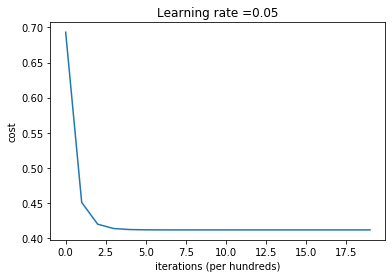

In [68]:
parameters = L_layer_model(x_train, y_train,layers_dims,learning_rate = 0.05,num_iterations = 2000, print_cost = True)

### Training Accuracy

In [69]:
thresold=float(input("Enter Thresold "))

Enter Thresold 0.4


In [70]:
pred=predict(parameters,x_train,thresold)

In [71]:
pred

array([[0., 0., 0., ..., 0., 0., 0.]])

In [72]:
 accuracy(y_train,pred)

85.63516169376452

### Testing Accuracy

In [76]:
thresold=float(input("Enter Thresold "))

Enter Thresold 0.4


In [77]:
pred=predict(parameters,x_test,thresold)

In [78]:
pred

array([[0., 0., 0., ..., 0., 0., 0.]])

In [79]:
 accuracy(y_test,pred)

86.0